        GW期間中は下記の本の勉強(理論)，車椅子自動制御の実験を行った
        ・lidarというセンサーから取得した値をヒストグラムにした
        ・値の変動であるノイズを数値化                                                                 
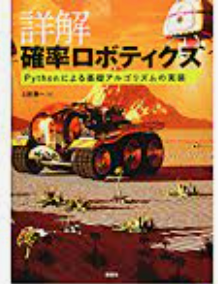       

In [2]:
#lidarのセンサ値を採取した日付，時刻，光センサからのセンサ値，lidarからのセンサ値を表示
import pandas as pd
data=pd.read_csv("/Users/suzukamayo/研究/理論/LNPR/data/sensor_data_200.txt",delimiter=" ",
                header=None,names=("data","time","ir","lidar"))
data


,data,time,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
...,...,...,...,...
58983,20180124,120023,313,208
58984,20180124,120026,297,200
58985,20180124,120030,323,204
58986,20180124,120033,326,207


In [12]:
print(data["ir"][0:5])   #data["lidar"]から先頭の5個の値を出力している

0    305
1    299
2    292
3    321
4    298
Name: ir, dtype: int64


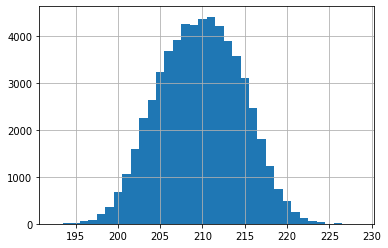

In [4]:
#lidarのセンサ値をヒストグラムにした  
import matplotlib.pyplot as plt #モジュールの下のモジュール
data["lidar"].hist(bins=max(data["lidar"])-min(data["lidar"]),align='left') #binsは横軸の各区間，histはヒストグラムを作っている
plt.show()

In [5]:
#センサ値を平均をそれぞれの手法で求めている
mean1=sum(data["lidar"].values)/len(data["lidar"].values)
mean2=data["lidar"].mean()
print(mean1,mean2)

209.73713297619855 209.73713297619855


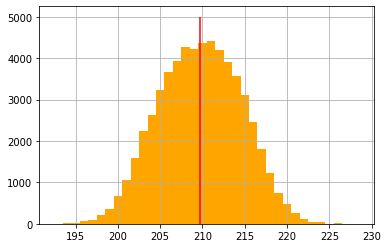

In [6]:
#平均値のところに縦線を引くヒストグラムを描画
data["lidar"].hist(bins=max(data["lidar"])-min(data["lidar"]),color="orange",align='left') #binsは横軸の各区間
plt.vlines(mean1,ymin=0,ymax=5000,color="red")
plt.show()

In [10]:
#標本分散という各値と平均値の差を２乗したものの平均   (分散)
#割り算の分母がN-1の不偏分散をそれぞれ求める
#定義から計算
zs=data["lidar"].values
mean=sum(zs)/len(zs)
diff_square=[(z-mean)**2 for z in zs]
sampling_var=sum(diff_square)/(len(zs))  #標本分散
unbiased_var=sum(diff_square)/(len(zs)-1)  #不偏分散
print(sampling_var)
print(unbiased_var)
#pandasを使用
pandas_sampling_var=data["lidar"].var(ddof=False) #標本分散
pandas_default_var=data["lidar"].var() #不偏分散
print(pandas_sampling_var)
print(pandas_default_var)
#numpyを使用
import numpy as np
numpy_default_var=np.var(data["lidar"]) #デフォルト(標本分散)
numpy_unbiased_var=np.var(data["lidar"], ddof=1) #(不偏分散)
print(numpy_default_var)
print(numpy_unbiased_var)

23.407709770274106
23.40810659855441
23.4077097702742
23.408106598554504
23.4077097702742
23.408106598554504


In [11]:
#標準偏差 つまり分散の正の平方根
import math

#定義から計算
stddev1=math.sqrt(sampling_var)
stddev2=math.sqrt(unbiased_var)

#pandasを使用
pandas_stddev=data["lidar"].std()

print(stddev1)
print(stddev2)
print(pandas_stddev)

4.838151482774605
4.83819249292072
4.838192492920729
